Installiing necessary packages with 'pip' (preferred installer program)

In [ ]:
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime
import yfinance as yf



[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-08-28,288.000000,291.450012,285.799988,290.260010,290.260010,14239300
2023-08-29,288.579987,299.149994,288.179993,297.989990,297.989990,20844500
2023-08-30,297.170013,298.290009,293.429993,295.100006,295.100006,17717000


Here we will test the classical indicators for trend following and for range trading, these are:

- EMA
- ATR
- ADX
- RSI
- MACD

We are using Ta-Lib, a technical indicator package. However, it is sometimes not that easy to install (for Colab) - but it is a very popular packae among traders. The following installing process is a workaround for Colab, but if you work locally, it should be much easier

In [ ]:
!pip install pandas
!pip install numpy==1.23.2
!pip install FinMind
!pip install yfinance
!pip install mplfinance
!pip install lineTool
!pip install requests
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!rm -rf *.so
!rm -rf *.c
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 972.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.0 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.5.25-py3-none-any.whl size=24861 sha256=913f3bac18f03fd79a532e575b590778e90c51412922ca9db7862716de5cecac
  Stored in directory: /root/.cache/pip/wheels/d4/bd/c4/0dda911b5461ee856352cd8c9e16472229bb51c95e74b74c08
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lineTool: filename=lineTool-1.0.3-py3-none-any.whl size=1439 sha256=9b26a5e8e6ee2208a99297034d8c22eddfadfe2d175fbc7ab37e309019afb42b
  Stored in

In [ ]:
df['Adj Close'].values

array([ 38.22999954,  34.02999878,  31.        , ..., 295.1000061 ,
       295.89001465, 296.38000488])

In [ ]:
df['EMA30'] = ta.EMA(df['Adj Close'].values, timeperiod=30)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Adj Close'].values, timeperiod=14)
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Adj Close'].values, timeperiod=14)
df['RSI'] = ta.RSI(df['Adj Close'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(df['Adj Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACDsignal'] = macdsignal


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
Date,,,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,288.000000,291.450012,285.799988,290.260010,290.260010,14239300,291.578280,296.276375,9.248091,22.685927,45.270957,-3.725139,-1.711326
2023-08-29,288.579987,299.149994,288.179993,297.989990,297.989990,20844500,292.744045,296.386931,9.371084,21.448948,51.066062,-3.027797,-1.974620
2023-08-30,297.170013,298.290009,293.429993,295.100006,295.100006,17717000,293.172402,296.303904,9.048865,20.300324,48.977987,-2.677481,-2.115192


If you want to generate multiple featuers, this is a shortcut

Here you drop the NaNs from the entire dataframe

This part is important - this is how we create flags and eliminate some of the "noise" in financial data. These are called "flags."

In [ ]:
import numpy as np
df['ClgtEMA10'] = np.where(df['Adj Close'] > df['EMA10'], 1, -1)




<ipython-input-10-71417624d64f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ClgtEMA10'] = np.where(df['Adj Close'] > df['EMA10'], 1, -1)
<ipython-input-10-71417624d64f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA10gtEMA30'] = np.where(df['EMA10'] > df['EMA30'], 1, -1)
<ipython-input-10-71417624d64f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,ATR,ADX,...,EMA20,EMA25,EMA35,EMA40,EMA45,EMA50,EMA55,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-28,288.000000,291.450012,285.799988,290.260010,290.260010,14239300,291.578280,296.276375,9.248091,22.685927,...,295.759451,296.402377,295.559726,294.393992,292.887388,291.122752,289.164503,-1,-1,1
2023-08-29,288.579987,299.149994,288.179993,297.989990,297.989990,20844500,292.744045,296.386931,9.371084,21.448948,...,295.971883,296.524501,295.694741,294.569407,293.109240,291.392056,289.479699,1,-1,1
2023-08-30,297.170013,298.290009,293.429993,295.100006,295.100006,17717000,293.172402,296.303904,9.048865,20.300324,...,295.888847,296.414925,295.661700,294.595289,293.195795,291.537465,289.680424,1,-1,1
2023-08-31,295.799988,301.100006,295.660004,295.890015,295.890015,17229900,293.666513,296.277201,8.831089,18.877860,...,295.888958,296.374547,295.674384,294.658447,293.312935,291.708154,289.902195,1,-1,1
2023-09-01,299.369995,301.739990,294.470001,296.380005,296.380005,12819800,294.159875,296.283834,8.719582,17.707205,...,295.935725,296.374967,295.713585,294.742425,293.446286,291.891363,290.133546,1,-1,-1


Here, we create the Y - the target variables

<ipython-input-11-419116c19032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'] = df['Adj Close'].pct_change(1).shift(-1)


We are creating two types of Y: One for classification and one for regression

<ipython-input-12-043e77499734>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_cls'] = np.where(df.Return > 0, 1, 0)


In [ ]:
df['target_rgs'] = df['Return']


<ipython-input-13-d7e4e807e558>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_rgs'] = df['Return']


In [ ]:
df = df.dropna()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,ATR,ADX,...,EMA40,EMA45,EMA50,EMA55,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,Return,target_cls,target_rgs
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-25,286.130005,288.390015,276.029999,285.500000,285.500000,23701400,291.871229,296.691297,9.501789,22.941305,...,294.605991,293.006814,291.157966,289.123929,-1,-1,1,0.016673,1,0.016673
2023-08-28,288.000000,291.450012,285.799988,290.260010,290.260010,14239300,291.578280,296.276375,9.248091,22.685927,...,294.393992,292.887388,291.122752,289.164503,-1,-1,1,0.026631,1,0.026631
2023-08-29,288.579987,299.149994,288.179993,297.989990,297.989990,20844500,292.744045,296.386931,9.371084,21.448948,...,294.569407,293.109240,291.392056,289.479699,1,-1,1,-0.009698,0,-0.009698
2023-08-30,297.170013,298.290009,293.429993,295.100006,295.100006,17717000,293.172402,296.303904,9.048865,20.300324,...,294.595289,293.195795,291.537465,289.680424,1,-1,1,0.002677,1,0.002677
2023-08-31,295.799988,301.100006,295.660004,295.890015,295.890015,17229900,293.666513,296.277201,8.831089,18.877860,...,294.658447,293.312935,291.708154,289.902195,1,-1,1,0.001656,1,0.001656


Here we care the X. The features we need to make predictions.

In [ ]:
predictors_list = ['ATR', 'ADX','RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
X = df[predictors_list]
X.tail()

,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,
2023-08-25,9.501789,22.941305,41.295694,-1,-1,1
2023-08-28,9.248091,22.685927,45.270957,-1,-1,1
2023-08-29,9.371084,21.448948,51.066062,1,-1,1
2023-08-30,9.048865,20.300324,48.977987,1,-1,1
2023-08-31,8.831089,18.877860,49.584857,1,-1,1


,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
count,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000
mean,4.387467,25.221911,53.993448,0.184494,0.287868,-0.020818
std,2.964835,10.430170,11.945913,0.983010,0.957842,0.999963
min,0.592275,8.457490,21.934202,-1.000000,-1.000000,-1.000000
25%,1.809543,17.209548,45.674357,-1.000000,-1.000000,-1.000000
50%,3.498380,23.008236,54.388235,1.000000,1.000000,-1.000000
75%,6.802650,30.869841,62.747748,1.000000,1.000000,1.000000
max,16.665167,58.323840,89.389520,1.000000,1.000000,1.000000


In [ ]:
y_cls = df.target_cls
y_cls.value_counts()

1    1288
0    1174
Name: target_cls, dtype: int64

In [ ]:
y_rgs = df.target_rgs
y_rgs.tail()

Date
2022-04-11   -0.010718
2022-04-12    0.003969
2022-04-13   -0.022373
2022-04-14    0.002807
2022-04-18    0.031029
Name: target_rgs, dtype: float64

Splitting the data into training and testing data sets.
Note that this is the the proper way to split time series for training - we use it here for your practice.

In [ ]:
from sklearn.model_selection import train_test_split
y=y_cls

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

print (X_cls_train.shape, y_cls_train.shape)
print (X_cls_test.shape, y_cls_test.shape)

(1723, 6) (1723,)
(739, 6) (739,)


This is the proper way

(1723, 6) (1723,)
(739, 6) (739,)


In [ ]:
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]

print (X_rgs_train.shape, y_rgs_train.shape)
print (X_rgs_test.shape, y_rgs_test.shape)

Decision Trees for Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=10)#, min_samples_leaf=10)
clf

DecisionTreeClassifier(max_depth=10)

In [ ]:
clf = clf.fit(X_cls_train, y_cls_train)
clf

DecisionTreeClassifier(max_depth=10)

In [ ]:
!pip install graphviz


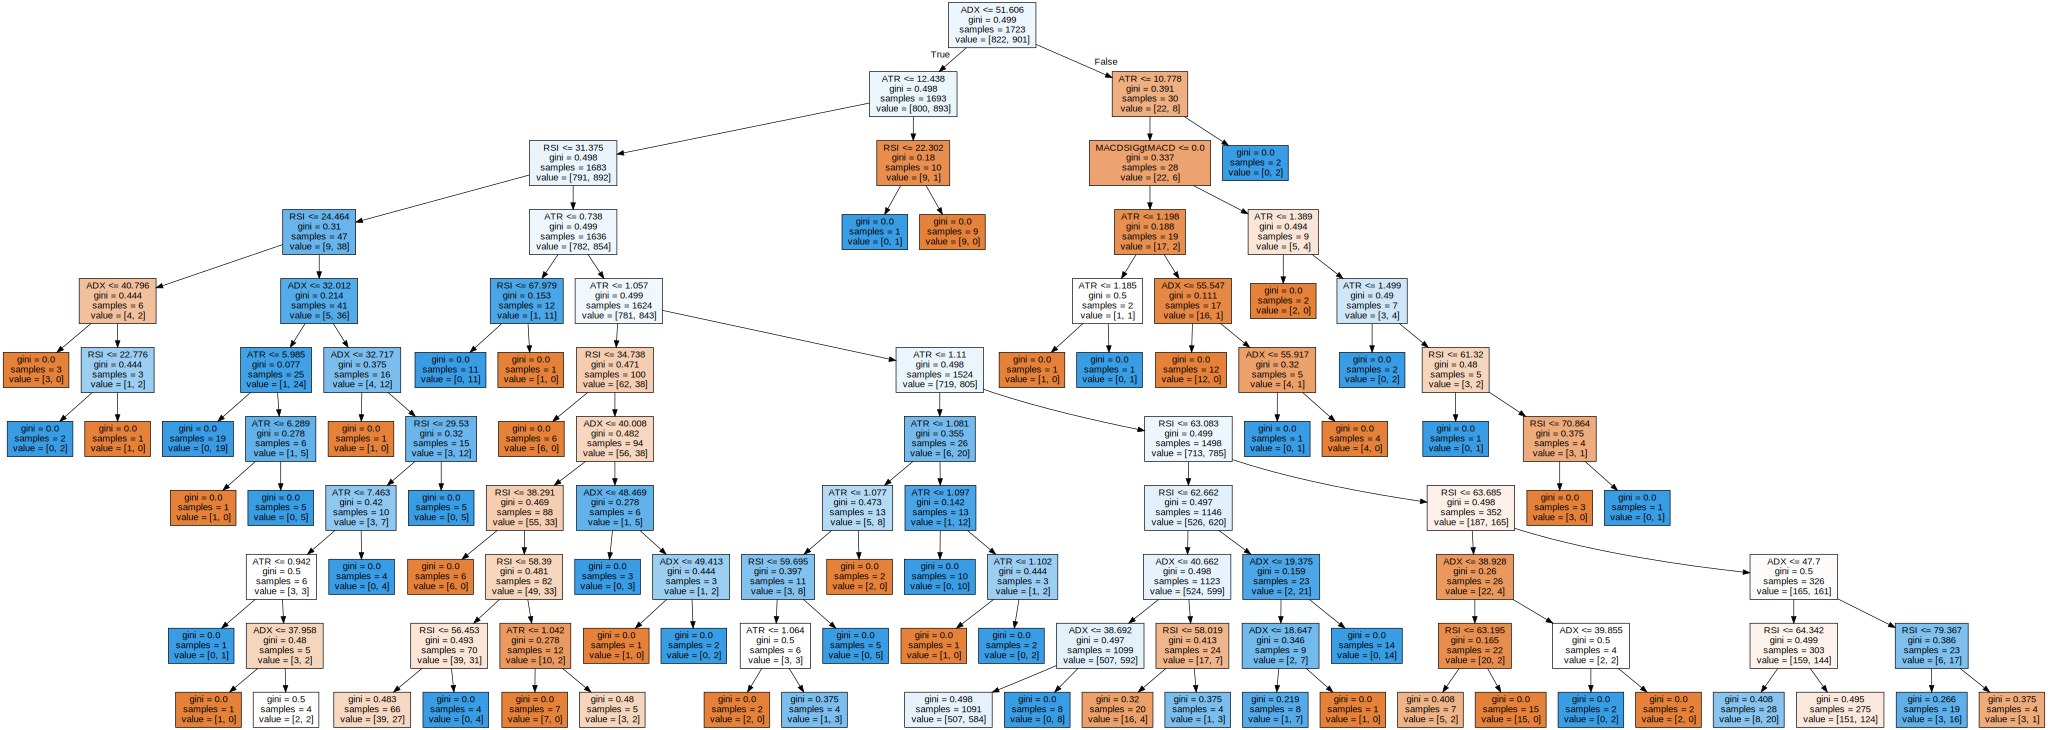

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,feature_names=predictors_list)
graphviz.Source(dot_data)

Make Forecast

In [ ]:
y_cls_pred = clf.predict(X_cls_test)
print(y_cls_pred)

[1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 0 

In [ ]:
y_pred_prob = clf.predict_proba(X_cls_test) # for probability prediction
print(y_pred_prob)

[[0.46471127 0.53528873]
 [0.46471127 0.53528873]
 [0.46471127 0.53528873]
 ...
 [0.46471127 0.53528873]
 [0.54909091 0.45090909]
 [0.46471127 0.53528873]]


In [ ]:
y_cls_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.33      0.42       352
           1       0.56      0.77      0.65       387

    accuracy                           0.56       739
   macro avg       0.56      0.55      0.53       739
weighted avg       0.56      0.56      0.54       739



Decision Trees for Regression

In [ ]:
# Regression tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 200)

In [ ]:
dtr.fit(X_rgs_train, y_rgs_train)

DecisionTreeRegressor(min_samples_leaf=200)

In this graph we can see all the relevant information in each node:

- the predictor variable used to split the data set.
- the value of MSE.
- the number of data points available at that node


In [ ]:
y_rgs_train.describe()

count    1241.000000
mean        0.000360
std         0.008567
min        -0.054328
25%        -0.003102
50%         0.000464
75%         0.004567
max         0.055455
Name: target_rgs, dtype: float64

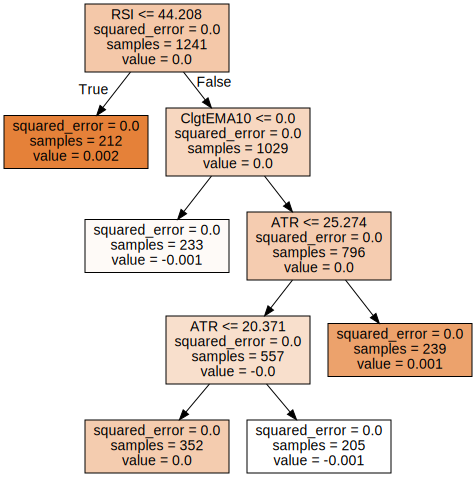

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtr,
                  out_file=None,
                  filled=True,
                  feature_names=predictors_list)
graphviz.Source(dot_data)